In [17]:
# Bibliotecas:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.stats import pearsonr
from networkx.algorithms import community
np.random.seed(50)

In [ ]:
# Importando arquivos:
from google.colab import files
files.upload()

# Comunidades

In [50]:
# Leitura da rede
G = nx.read_edgelist('/content/zachary.txt') 

In [21]:
nodes_original = G.nodes
print('Original:', nodes_original)

Original: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '10', '11', '12', '13', '17', '19', '21', '31', '30', '9', '27', '28', '32', '16', '33', '14', '15', '18', '20', '22', '23', '25', '29', '24', '26']


In [12]:
print('Número de vértices:', nx.number_of_nodes(G))
print('Número de conexões:', nx.number_of_edges(G))

Número de vértices: 34
Número de conexões: 78


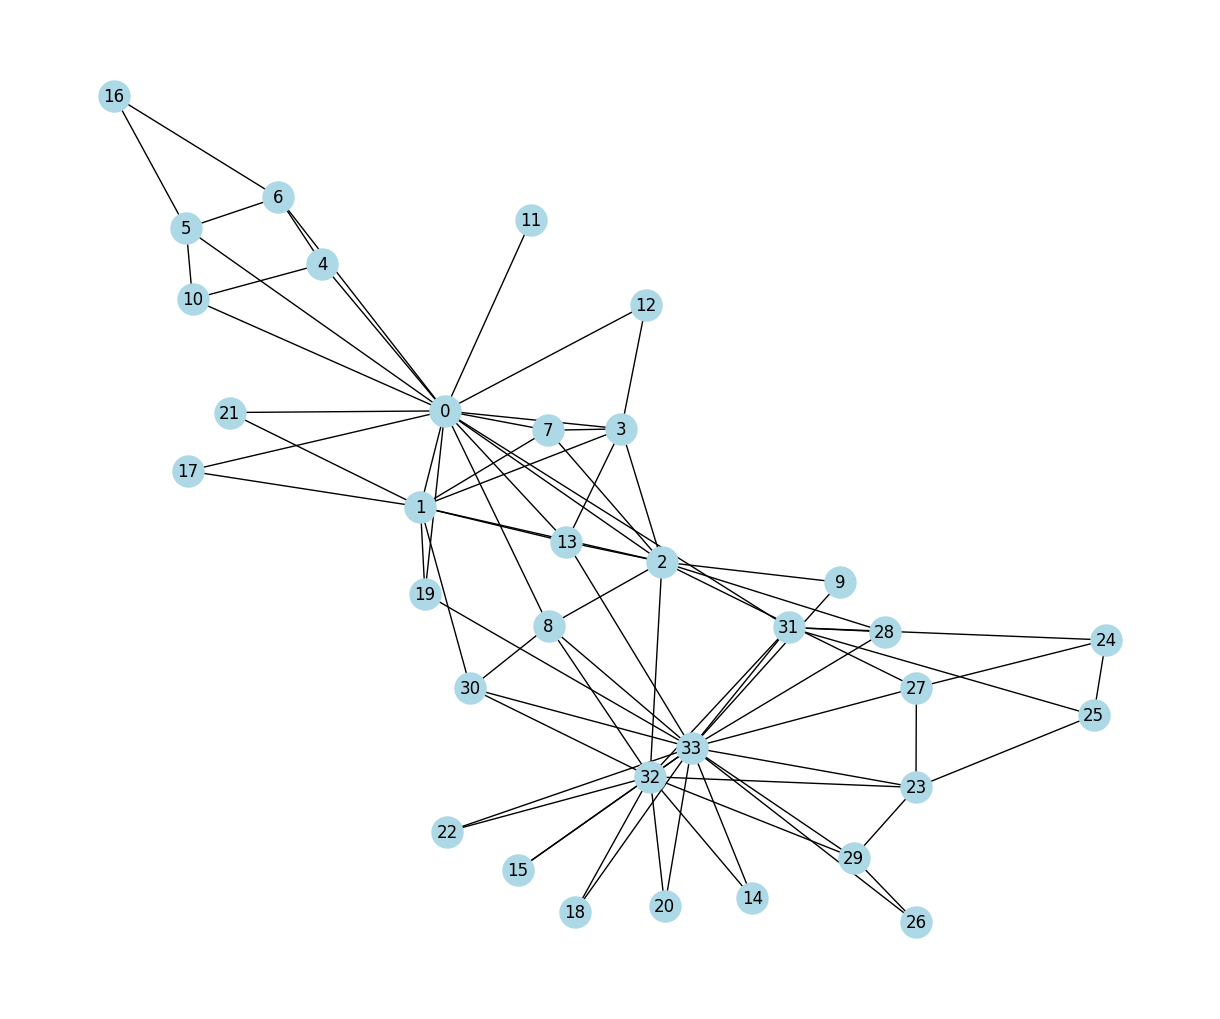

In [22]:
plt.figure(figsize = (12, 10))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color = "lightblue", node_size = 500, with_labels = True)

In [51]:
# Preparação da rede:
G.to_undirected() #undirected
G.remove_edges_from(nx.selfloop_edges(G)) #remove selfloops
Gcc = sorted(nx.connected_components(G), key = len, reverse = True) #maior componente conectado
G = G.subgraph(Gcc[0])
G = nx.convert_node_labels_to_integers(G, first_label = 0)

In [16]:
print('Número de vértices:', nx.number_of_nodes(G))
print('Número de conexões:', nx.number_of_edges(G))
# a rede se manteve a mesma quanto ao nº de itens

Número de vértices: 34
Número de conexões: 78


In [24]:
print('Original:', nodes_original)
print('New labels:', G.nodes)
#vértices foram renomeados

Original: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '10', '11', '12', '13', '17', '19', '21', '31', '30', '9', '27', '28', '32', '16', '33', '14', '15', '18', '20', '22', '23', '25', '29', '24', '26']
New labels: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


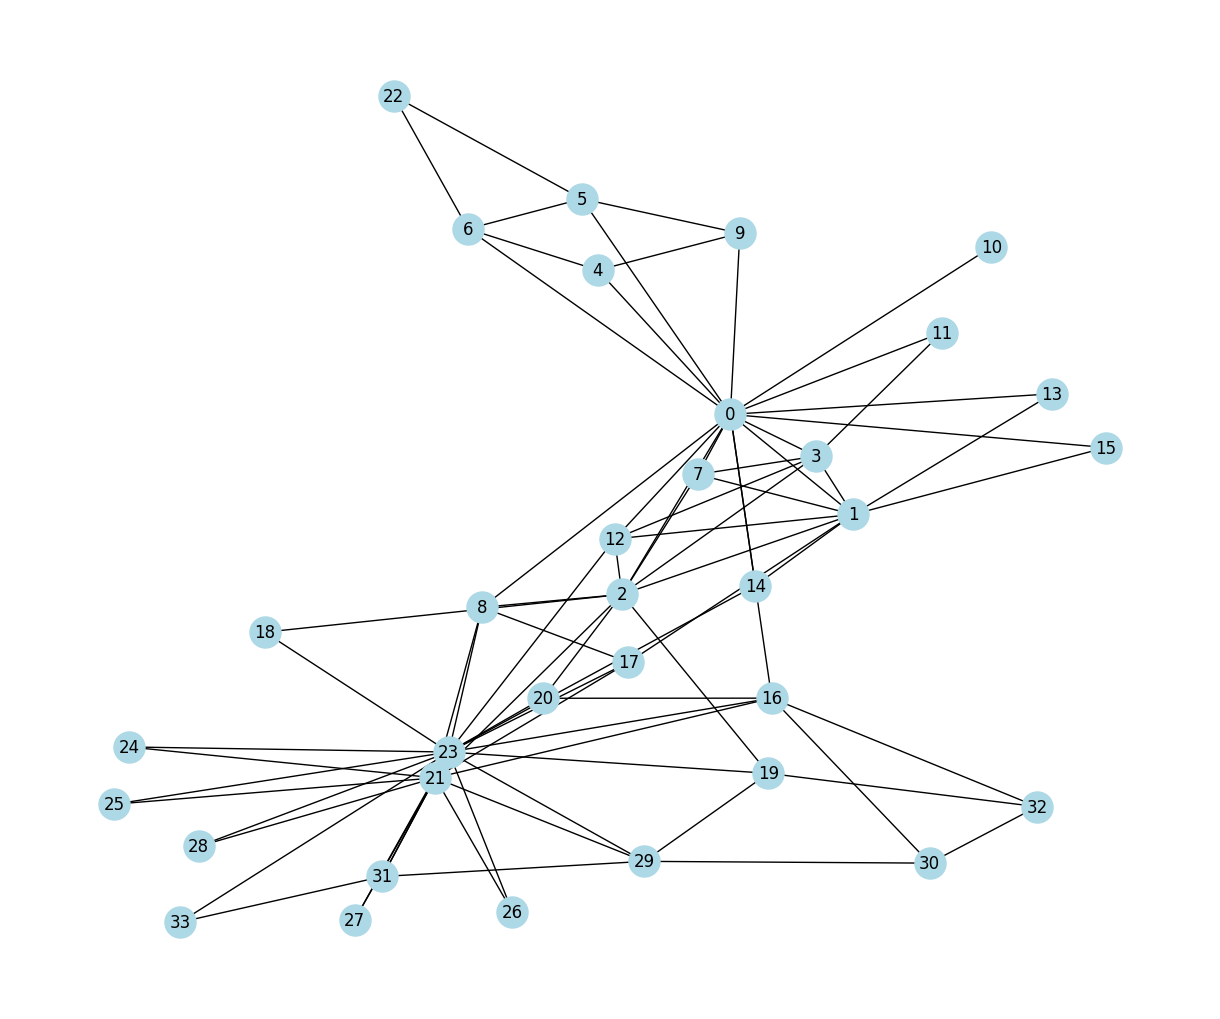

In [25]:
plt.figure(figsize = (12, 10))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color = "lightblue", node_size = 500, with_labels = True)

# Métodos para identificação de comunidades

Comunidades corresponde a uma organização modular da rede. 
Em uma comunidade temos uma maior densidade de conexões entre os vértices.

## Método de Girvan-Newman

Decomposição hierárquica da rede; método baseado na 'betweeness centrality'.

### Testes

In [32]:
# Girvan-Newman method (betweeness centrality)
communities = community.centrality.girvan_newman(G)
type(communities)

generator

In [33]:
next(communities)

({0, 1, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 22},
 {2, 8, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})

In [34]:
k = 2
for i in range(0, k - 1):
  next_level_comm = next(communities)
c = sorted(map(sorted, next_level_comm)) #por tamanho

for cl in c:
  print('Community:', cl)

Community: [0, 1, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 22]
Community: [2, 8, 16, 17, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Community: [18]


O que aconteceu aqui com o vértice 18???

### Girvan-Newman method

In [35]:
# Girvan-Newman method (betweenness centrality)
communities = community.centrality.girvan_newman(G)
k = 2
for i in range(0, k-1):
    next_level_communities = next(communities)
c = sorted(map(sorted, next_level_communities))
for cl in c:
    print('community:', cl)

community: [0, 1, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 22]
community: [2, 8, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


### Plot com cores diferentes

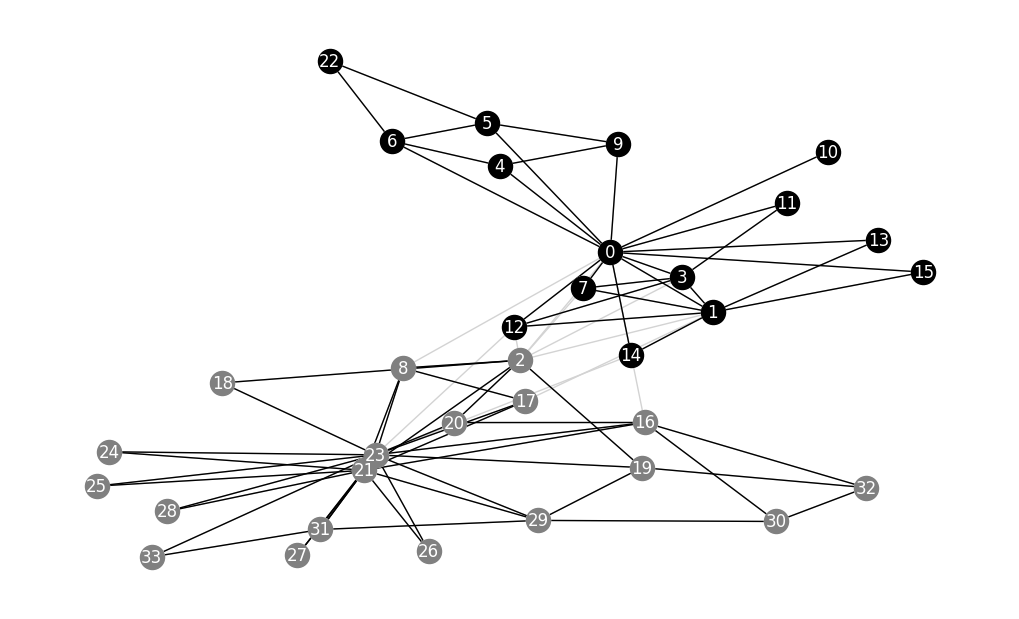

In [36]:
# Plotting the communities with different colors
colors = ['black', 'gray', 'green', 'c', 'm', 'y', 'w']

fig= plt.figure(figsize=(10,6))
nx.draw(G, pos=pos, node_color = 'white', edge_color='lightgray')
aux = 0
for cm in c:
    nx.draw(G.subgraph(cm), pos=pos, node_color = colors[aux], 
                     with_labels = True, node_size=300, font_color = 'white')
    aux = aux + 1
plt.savefig('Zachary.eps') #save the figure into a file
plt.show(True)

### Dendrograma

<Figure size 640x480 with 0 Axes>

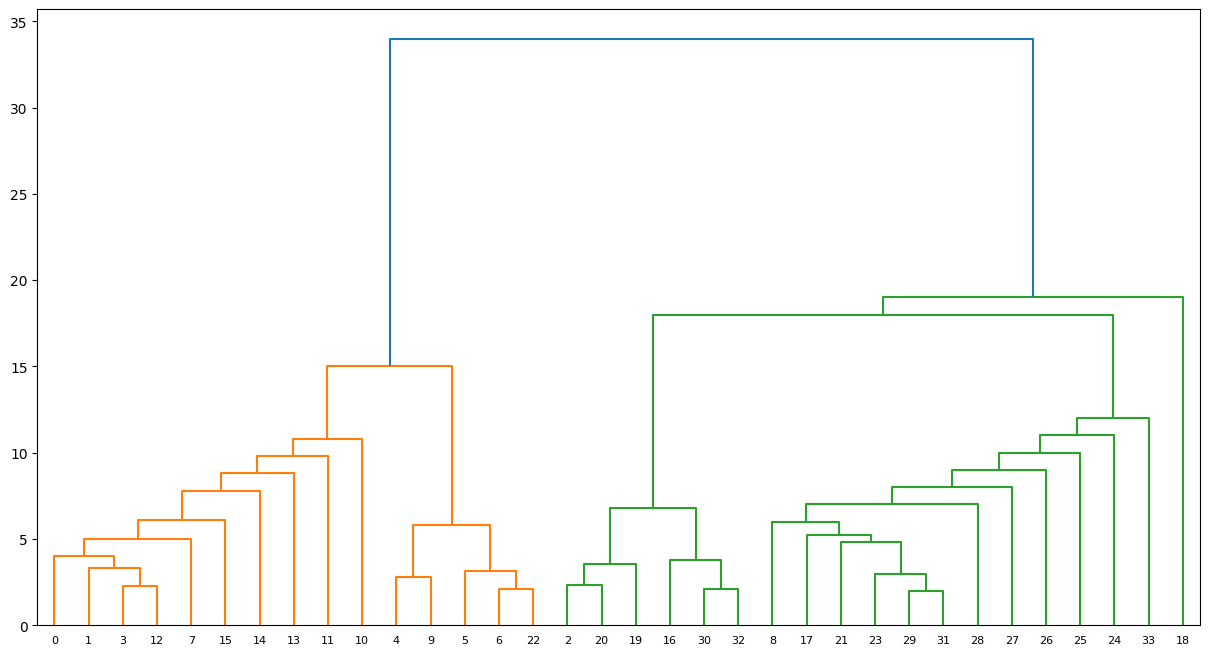

In [37]:
import networkx as nx
from itertools import chain, combinations
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

communities = list(community.centrality.girvan_newman(G))

# building initial dict of node_id to each possible subset:
node_id = 0
init_node2community_dict = {node_id: communities[0][0].union(communities[0][1])}
for comm in communities:
    for subset in list(comm):
        if subset not in init_node2community_dict.values():
            node_id += 1
            init_node2community_dict[node_id] = subset

# turning this dictionary to the desired format 
node_id_to_children = {e: [] for e in init_node2community_dict.keys()}
for node_id1, node_id2 in combinations(init_node2community_dict.keys(), 2):
    for node_id_parent, group in init_node2community_dict.items():
        if len(init_node2community_dict[node_id1].intersection(init_node2community_dict[node_id2])) == 0 and group == init_node2community_dict[node_id1].union(init_node2community_dict[node_id2]):
            node_id_to_children[node_id_parent].append(node_id1)
            node_id_to_children[node_id_parent].append(node_id2)

# recording node_labels dict for the correct label for dendrogram leaves
node_labels = dict()
for node_id, group in init_node2community_dict.items():
    if len(group) == 1:
        node_labels[node_id] = list(group)[0]
    else:
        node_labels[node_id] = ''

# needing a subset to rank dict to later know within all k-length merges which came first
subset_rank_dict = dict()
rank = 0
for e in communities[::-1]:
    for p in list(e):
        if tuple(p) not in subset_rank_dict:
            subset_rank_dict[tuple(sorted(p))] = rank
            rank += 1
subset_rank_dict[tuple(sorted(chain.from_iterable(communities[-1])))] = rank

# a function to get a merge height so that it is unique
def get_merge_height(sub):
    sub_tuple = tuple(sorted([node_labels[i] for i in sub]))
    n = len(sub_tuple)
    other_same_len_merges = {k: v for k, v in subset_rank_dict.items() if len(k) == n}
    min_rank, max_rank = min(other_same_len_merges.values()), max(other_same_len_merges.values())
    range = (max_rank-min_rank) if max_rank > min_rank else 1
    return float(len(sub)) + 0.8 * (subset_rank_dict[sub_tuple] - min_rank) / range

G           = nx.DiGraph(node_id_to_children)
nodes       = G.nodes()
leaves      = set( n for n in nodes if G.out_degree(n) == 0 )
inner_nodes = [ n for n in nodes if G.out_degree(n) > 0 ]

# Compute the size of each subtree
subtree = dict( (n, [n]) for n in leaves )
for u in inner_nodes:
    children = set()
    node_list = list(node_id_to_children[u])
    while len(node_list) > 0:
        v = node_list.pop(0)
        children.add( v )
        node_list += node_id_to_children[v]
    subtree[u] = sorted(children & leaves)

inner_nodes.sort(key=lambda n: len(subtree[n])) # <-- order inner nodes ascending by subtree size, root is last

# Construct the linkage matrix
leaves = sorted(leaves)
index  = dict( (tuple([n]), i) for i, n in enumerate(leaves) )
Z = []
k = len(leaves)
for i, n in enumerate(inner_nodes):
    children = node_id_to_children[n]
    x = children[0]
    for y in children[1:]:
        z = tuple(sorted(subtree[x] + subtree[y]))
        i, j = index[tuple(sorted(subtree[x]))], index[tuple(sorted(subtree[y]))]
        Z.append([i, j, get_merge_height(subtree[n]), len(z)]) # <-- float is required by the dendrogram function
        index[z] = k
        subtree[z] = list(z)
        x = z
        k += 1

# dendrogram
plt.figure()
fig= plt.figure(figsize=(15,8))
dendrogram(Z, labels=[node_labels[node_id] for node_id in leaves], leaf_rotation=0)
plt.savefig('dendrogram.eps')

## Método "Greedy-optimization" (fastgreedy)

Método guloso, tende a encontrar comunidades maiores.

In [44]:
greedy_modularity_communities(G)

[frozenset({8,
            16,
            17,
            19,
            20,
            21,
            23,
            24,
            25,
            26,
            27,
            28,
            29,
            30,
            31,
            32,
            33}),
 frozenset({1, 2, 3, 7, 11, 12, 13, 15, 18}),
 frozenset({0, 4, 5, 6, 9, 10, 14, 22})]

In [45]:
# Clauset-Newman-Moore greedy modularity maximization
from networkx.algorithms.community import greedy_modularity_communities

communities = list(greedy_modularity_communities(G))
for k in range(0,len(communities)):
    print('Community',k,':', sorted(communities[k]))

Community 0 : [8, 16, 17, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Community 1 : [1, 2, 3, 7, 11, 12, 13, 15, 18]
Community 2 : [0, 4, 5, 6, 9, 10, 14, 22]


### Plot com diferentes cores

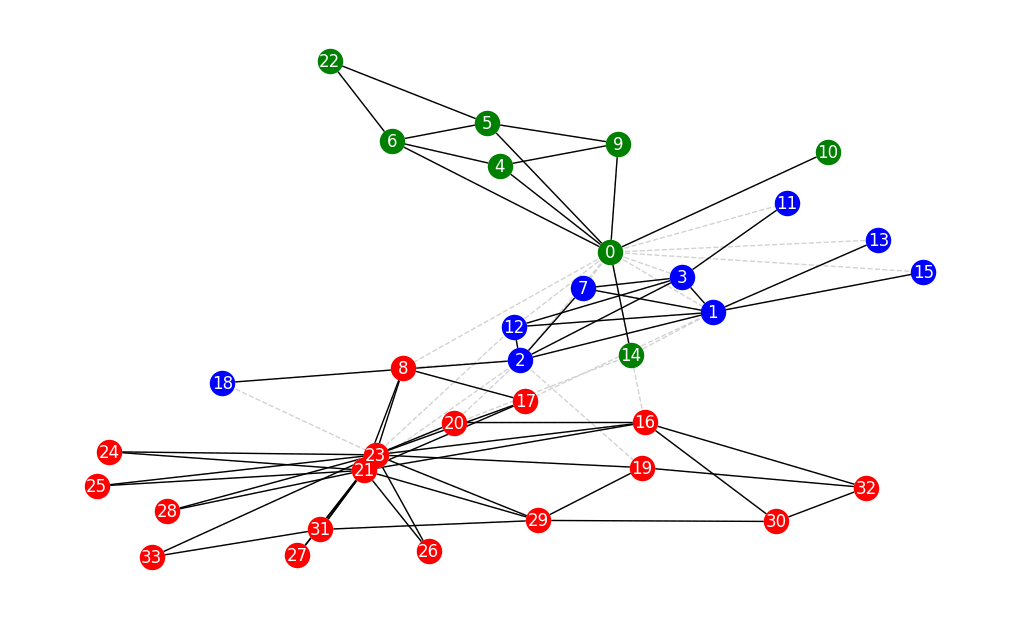

In [46]:
colors = ['red', 'blue', 'green', 'black', 'magenta', 'yellow', 'white']

fig= plt.figure(figsize=(10,6))
nx.draw(G, pos=pos, node_color = 'white', edge_color='lightgray', style='dashed')
aux = 0
for cm in communities:
    nx.draw(G.subgraph(cm), pos=pos, node_color = colors[aux], 
                     with_labels = True, node_size=300, font_color = 'white')
    aux = aux + 1
plt.savefig('Zachary.eps') #save the figure into a file
plt.show(True)

## Método de Louvain

Método heurístico de detecção de comunidades

In [61]:
!pip install python-louvain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
import community as community_louvain
import networkx as nx
import matplotlib.pyplot as plt
import networkx as nx

In [63]:
!pip3 install --upgrade networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [66]:
# AttributeError: module 'community' has no attribute 'best_partition'
import community.community_louvain as community_louvain

In [67]:
community_louvain.best_partition(G)

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 3,
 5: 3,
 6: 3,
 7: 0,
 8: 1,
 9: 3,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 2,
 17: 1,
 18: 0,
 19: 2,
 20: 2,
 21: 1,
 22: 3,
 23: 1,
 24: 1,
 25: 1,
 26: 1,
 27: 1,
 28: 1,
 29: 2,
 30: 2,
 31: 1,
 32: 2,
 33: 1}

In [68]:
partitions =community_louvain.best_partition(G)

### Plot com diferentes cores

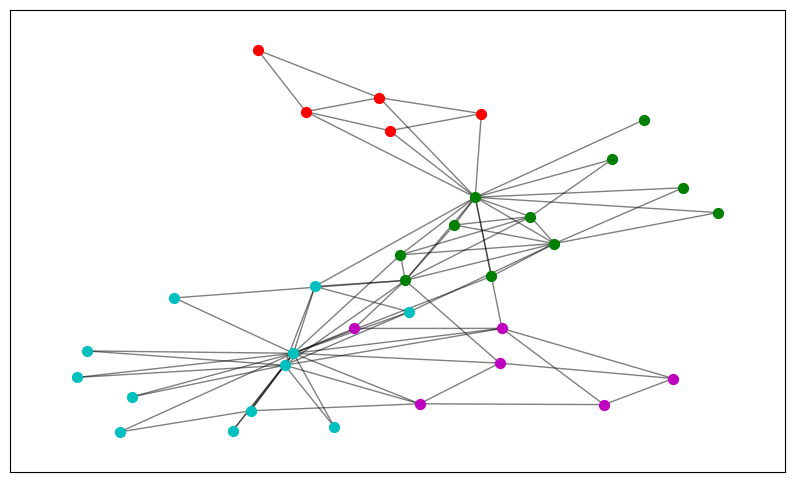

In [69]:
# Plot
fig= plt.figure(figsize=(10,6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
size = float(len(set(partitions.values())))
count = 0
for com in set(partitions.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partitions.keys() if partitions[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 50, node_color = colors[int(count)])
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

# Medida de modularidade

Temos a expressão analítica para a modularidade da rede.

In [76]:
# Modularity for the obtained partition
def modularity(G, c):
    A = nx.adjacency_matrix(G)
    N = len(G)
    M = G.number_of_edges()
    Q = 0
    for i in np.arange(0,N):
        ki = len(list(G.neighbors(i)))
        for j in np.arange(0,N):
            if(c[i]==c[j]):
                kj = len(list(G.neighbors(j)))
                Q = Q + A[i,j]-(ki*kj)/(2*M)
    Q = Q/(2*M)
    return Q

Temos uma rede, para a qual *a priori* não sabemos o número de comunidades presente. Temos diversos algoritmos capazes de detectar comunidades: Girvan-Newman, Greedy optimization, Louvain, e após a indentificação das comunidades presentes, calculamos a modularidade da rede.

In [ ]:
print("Modularity Q = ", modularity(G,communities))

# Evaluation: Benchmark

> **Benchmark**: 
* *Noun* - a standard or point of reference against which things may be compared or assessed; a test designed to evaluate or compare the performance of computer hardware or software.
* *Verb* - evaluate or check (something) by comparison with a standard.

## Lancichinetti–Fortunato–Radicchi benchmark (LFR benchmark)

Lancichinetti–Fortunato–Radicchi benchmark is an algorithm that generates benchmark networks (artificial networks that resemble real-world networks). They have a priori known communities and are used to compare different community detection methods. The advantage of the benchmark over other methods is that it accounts for the heterogeneity in the distributions of node degrees and of community sizes.

In [87]:
# LFR Benchmark
N = 128
tau1 = 3
tau2 = 1.5
mu = 0.1
k =16
minc = 32
maxc = 32
G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k, 
                        max_degree = k, min_community=minc, max_community = maxc, seed = 10)

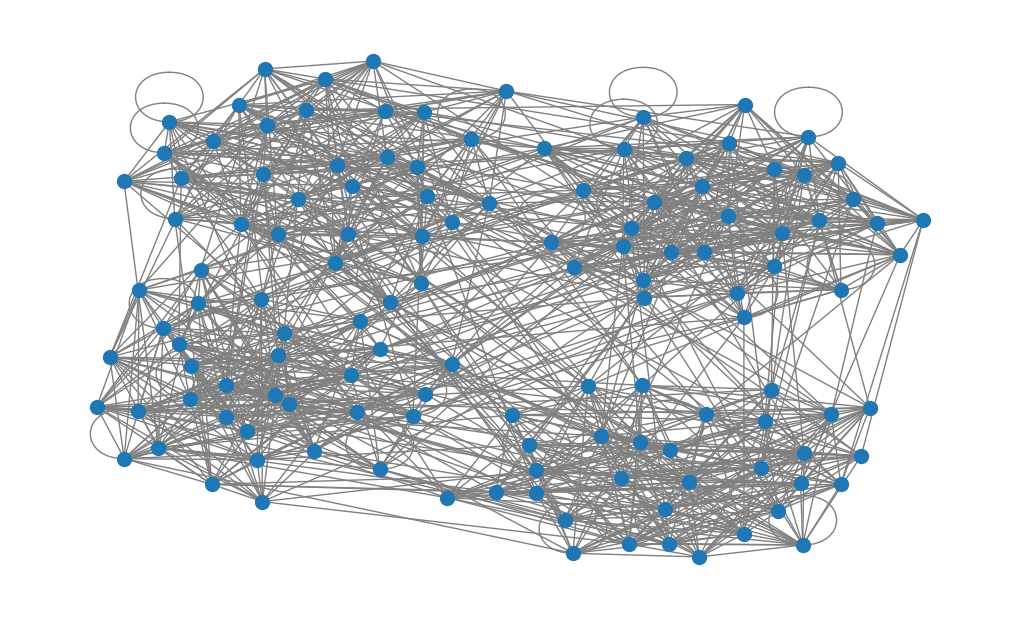

In [88]:
fig= plt.figure(figsize=(10,6))
pos=nx.spring_layout(G)
nx.draw(G, with_labels = False, edge_color='gray', 
        node_size=100, font_size=16,  width=1, pos = pos)
plt.show(True)

In [91]:
# o que se passa aqui? 

c = {frozenset(G.nodes[v]['community']) for v in G} #?
communities = np.zeros(len(G.nodes()))
cl = 0
for a in c:
    b = list(a)
    communities[b] = cl
    #print(cl,':',sort(b))
    cl = cl + 1
print(communities)

[3. 1. 0. 3. 0. 2. 1. 1. 2. 2. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 2.
 1. 1. 3. 3. 3. 0. 2. 1. 1. 0. 2. 3. 0. 1. 3. 1. 3. 0. 0. 3. 1. 1. 1. 2.
 1. 3. 3. 3. 1. 0. 2. 3. 3. 1. 2. 0. 1. 0. 1. 0. 1. 2. 1. 0. 2. 0. 3. 2.
 2. 1. 2. 2. 1. 2. 0. 3. 3. 2. 0. 3. 3. 1. 3. 3. 2. 2. 2. 2. 3. 2. 1. 3.
 0. 2. 2. 0. 0. 1. 3. 3. 2. 2. 3. 1. 0. 2. 1. 0. 0. 1. 2. 1. 2. 3. 1. 3.
 3. 3. 3. 1. 3. 2. 2. 0.]


In [92]:
print("Modularity Q = ", modularity(G, communities))

Modularity Q =  0.5415447373851243


# Questionário Q4

## 1) Calcule a modularidade para a rede Jazz usando método fastgreedy.

In [ ]:
files.upload()

In [72]:
# Leitura da rede:
G = nx.read_edgelist('/content/jazz.txt') 

In [73]:
# Preparação da rede:
G.to_undirected() #undirected
G.remove_edges_from(nx.selfloop_edges(G)) #remove selfloops
Gcc = sorted(nx.connected_components(G), key = len, reverse = True) #maior componente conectado
G = G.subgraph(Gcc[0])
G = nx.convert_node_labels_to_integers(G, first_label = 0)

In [74]:
print('Número de vértices:', nx.number_of_nodes(G))
print('Número de conexões:', nx.number_of_edges(G))

Número de vértices: 198
Número de conexões: 2742


In [75]:
# Detecção de comunidades: fastgreedy
# Clauset-Newman-Moore greedy modularity maximization
from networkx.algorithms.community import greedy_modularity_communities

#communities = list(greedy_modularity_communities(G))
#for k in range(0,len(communities)):
#    print('Community',k,':', sorted(communities[k]))

Community 0 : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 100, 111, 120, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 144, 145, 146, 147, 148, 149, 150, 151, 152, 157, 158, 159, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 191, 194]
Community 1 : [24, 25, 26, 27, 47, 53, 54, 73, 74, 75, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 131, 133, 137, 139, 143, 154, 156, 161, 162, 190, 192, 193, 197]
Community 2 : [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 76, 77, 78, 138, 140, 141, 142, 153, 155, 160, 179, 180, 181, 182, 183, 184, 185, 189, 195, 196]
Community 3 : [186, 187, 188]


In [78]:
c = list(greedy_modularity_communities(G))
communities = np.zeros(len(G.nodes()))
nc = 0
for k in range(0,len(c)):
    communities[sorted(c[k])]=nc
    nc = nc+1
    print('Community:', sorted(c[k]))

Community: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 100, 111, 120, 125, 126, 127, 128, 129, 130, 132, 134, 135, 136, 144, 145, 146, 147, 148, 149, 150, 151, 152, 157, 158, 159, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 191, 194]
Community: [24, 25, 26, 27, 47, 53, 54, 73, 74, 75, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 131, 133, 137, 139, 143, 154, 156, 161, 162, 190, 192, 193, 197]
Community: [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 76, 77, 78, 138, 140, 141, 142, 153, 155, 160, 179, 180, 181, 182, 183, 184, 185, 189, 195, 196]
Community: [186, 187, 188]


In [79]:
# Modularidade:
print("Modularity Q = ", modularity(G, communities))

Modularity Q =  0.4389078153753761


Q = 0.44

## 2) Calcule a modularidade para a rede Jazz usando método Louvain.

In [80]:
# Leitura da rede:
G = nx.read_edgelist('/content/jazz.txt') 

# Preparação da rede:
G.to_undirected() #undirected
G.remove_edges_from(nx.selfloop_edges(G)) #remove selfloops
Gcc = sorted(nx.connected_components(G), key = len, reverse = True) #maior componente conectado
G = G.subgraph(Gcc[0])
G = nx.convert_node_labels_to_integers(G, first_label = 0)

In [81]:
# Detecção de comunidades: Louvain
partitions = community_louvain.best_partition(G)

In [82]:
# Modularidade:
print("Modularity Q = ", modularity(G, partitions))

Modularity Q =  0.44461528823854385


Q = 0.44

## 3) Considere o método de geração de redes LFR_benchmark_graph. Obtenha os valores da modularidade para os seguintes valores. Use o código a seguir para gerar as redes. Use o algoritmo de Louvain.

In [93]:
mus = [0.05, 0.1, 0.2]
N = 128
tau1 = 3
tau2 = 1.5
k = 16
minc = 32
maxc = 32

for mu in mus:
  G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k, max_degree = k,
                           min_community = minc, max_community = maxc, seed = 10)

  # Detecção de comunidades: Louvain
  partitions = community_louvain.best_partition(G)

  # Cálculo modularidade:
  Q = modularity(G, partitions) 
  print('Q(mu =', mu, ') =', Q)

Q(mu = 0.05 ) = 0.6414502290712024
Q(mu = 0.1 ) = 0.5415447373851243
Q(mu = 0.2 ) = 0.44934888016341556


## 4) Considere o método de geração de redes LFR_benchmark_graph. Obtenha os valores da modularidade para os seguintes valores de mu. Use o código a seguir para gerar as redes. Use o algoritmo de Louvain.

In [94]:
mus = [0.05, 0.2, 0.4]
N = 128
tau1 = 3
tau2 = 1.5
k = 16
minc = 32
maxc = 32

for mu in mus:
  G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k, max_degree = k,
                           min_community = minc, max_community = maxc, seed = 10)

  # Detecção de comunidades: Louvain
  partitions = community_louvain.best_partition(G)

  # Cálculo modularidade:
  Q = modularity(G, partitions) 
  print('Q(mu =', mu, ') =', Q)

Q(mu = 0.05 ) = 0.6414502290712024
Q(mu = 0.2 ) = 0.44934888016341556
Q(mu = 0.4 ) = 0.19194514926298156


Opção no moodle: Q(mu = 0.05) = 0.64; Q(mu = 0.2) = 0.43; Q(mu = 0.4) = 0.16. Levemente diferente...
